# 2.2 Phần 2: Tiền xử lý dữ liệu bảng
## dataSet: Credit Card Fraud Detection (Kaggle)
+ Nguồn: https://www.kaggle.com/datasets/kartik2112/fraud-detection
+ Số dòng: 1,296,675 giao dịch
+ Số cột: 23 đặc trưng

### Mục tiêu
Phát hiện các giao dịch lừa đảo trong dữ liệu thẻ tín dụng bằng cách áp dụng các kỹ thuật tiền xử lý dữ liệu tiêu chuẩn trong học máy: xử lý giá trị thiếu, chuẩn hóa, mã hóa danh mục, và lựa chọn đặc trưng.

---

## Quy Trình Tiền Xử Lý Dữ Liệu

Quy trình này thực hiện 5 bước tiền xử lý chuẩn trong học máy, với focus đặc biệt vào phát hiện gian lận:


Dữ liệu thô -> Xử lý giá trị thiếu-> Chuẩn hóa dữ liệu -> Mã hóa danh mục -> Lựa chọn đặc trưng -> Dữ liệu sẵn sàng


### Tiền Xử Lý Quan Trọng vì:

- **Dữ liệu thô**: Chứa noise, missing values, scales khác nhau → mô hình sẽ học sai
- **Tiền xử lý tốt**: Tăng độ chính xác mô hình lên 5-20%, giảm overfitting
- **Fraud Detection**: Cần cẩn thận đặc biệt vì dữ liệu rất mất cân bằng (fraud cases chiếm <1%)

### Công Cụ Sẽ Sử Dụng

- **scikit-learn**: SimpleImputer, KNNImputer, MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder
- **pandas**: Xử lý dữ liệu
- **matplotlib + seaborn**: Visualization

In [1]:
# Các thư viện cơ bản cho phân tích và vẽ biểu đồ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scaler và encoder cho tiền xử lý
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder
# Simple imputer cho các chiến lược cơ bản
from sklearn.impute import SimpleImputer
# Công cụ lựa chọn đặc trưng và mô hình hóa
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Kiểu dáng biểu đồ
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
# Tắt cảnh báo để giữ output notebook sạch sẽ
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Tải dataset
data = pd.read_csv('../data/tabular/fraudTrain.csv')

In [3]:
# Hiển thị 5 dòng đầu tiên để kiểm tra cột
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
# Hiển thị kích thước dataset
data.shape

(1296675, 23)

In [5]:
# Thông tin nhanh: kiểu dữ liệu và số giá trị không null
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [6]:
# Đếm số giá trị thiếu theo từng cột
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
# Kiểm tra phân bố lớp target
data['is_fraud'].value_counts(normalize=True)

is_fraud
0    0.994211
1    0.005789
Name: proportion, dtype: float64

In [8]:
# Chuyển đổi ngày tháng giao dịch và trích xuất đặc trưng giờ
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['hour'] = data['trans_date_trans_time'].dt.hour

## 2.2.2 Các Kỹ Thuật Tiền Xử Lý Bắt Buộc

Tiền xử lý dữ liệu là bước quan trọng nhất trong học máy. Dữ liệu thô chứa nhiều vấn đề như giá trị thiếu, không có chuẩn, và có thể chứa lỗi. Các kỹ thuật sau đây sẽ được áp dụng tuần tự:

1. **Xử lý giá trị thiếu** - Loại bỏ hoặc bổ sung dữ liệu bị thiếu
2. **Chuẩn hóa dữ liệu** - Đưa các giá trị về cùng tỷ lệ
3. **Mã hóa danh mục** - Chuyển đổi dữ liệu văn bản thành số
4. **Lựa chọn đặc trưng** - Chọn các đặc trưng quan trọng nhất

### a) Xử Lý Giá Trị Thiếu

Giá trị thiếu có thể xảy ra do nhiều lý do: lỗi thu thập dữ liệu, mẫu không đủ thông tin hoặc do các yếu tố khác. Có ba loại dữ liệu thiếu:
- MCAR: Giá trị thiếu hoàn toàn ngẫu nhiên
- MAR: Giá trị thiếu phụ thuộc vào các biến khác
- MNAR: Giá trị thiếu có quy luật nhất định

#### Step 1: Phân tích Dữ Liệu Thiếu (MCAR, MAR, MNAR)

In [9]:
# Tính toán số giá trị thiếu và phần trăm theo cột
missing_data = data.isnull().sum()
missing_percent = (data.isnull().sum() / len(data)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_data,
    'Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Percentage', ascending=False)

print("Gia Tri Thieu:")
print(missing_df)

if missing_data.sum() > 0:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    missing_df_sorted = missing_df.sort_values('Percentage', ascending=True)
    axes[0].barh(missing_df_sorted.index, missing_df_sorted['Percentage'], color='coral')
    axes[0].set_xlabel('Phan Tram (%)')
    axes[0].set_title('Du Lieu Thieu')
    axes[0].grid(axis='x', alpha=0.3)
    
    # Hien thi mo hinh thieu du lieu cho 1000 dong dau tien
    missing_heatmap = data[missing_df_sorted.index].isnull().astype(int)
    sns.heatmap(missing_heatmap.iloc[:1000], cbar=False, cmap='YlOrRd', ax=axes[1])
    axes[1].set_title('Mo Hinh Du Lieu Thieu')
    
    plt.tight_layout()
    plt.show()
else:
    print("Khong co gia tri thieu trong dataset")

Gia Tri Thieu:
Empty DataFrame
Columns: [Missing_Count, Percentage]
Index: []
Khong co gia tri thieu trong dataset


#### Step 2: So Sánh Các Chiến Lược Imputation

Có nhiều cách để bổ sung giá trị thiếu:
- **Mean Imputation**: Thay thế bằng giá trị trung bình - đơn giản nhưng làm giảm phương sai
- **Median Imputation**: Sử dụng trung vị - tốt hơn với dữ liệu có outliers
- **Mode Imputation**: Sử dụng giá trị xuất hiện nhiều nhất - tốt cho dữ liệu danh mục
- **K-NN Imputation**: Sử dụng các lân cận gần nhất - preserves data structure tốt hơn
- **Forward/Backward Fill**: Cho dữ liệu chuỗi thời gian



In [10]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# Phan chia cac cot dua tren kieu du lieu
cat_cols = data.select_dtypes(include='object').columns.tolist()
num_cols = data.select_dtypes(include=['int64', 'float64']).columns.drop('is_fraud', errors='ignore').tolist()

print(f"Cac cot danh muc: {cat_cols}")
print(f"Cac cot so: {num_cols}\n")

data_copy = data.copy()

# Mean Imputation
# Su dung gia tri trung binh - nhanh nhung lam giam do bien thien
data_mean = data_copy.copy()
imputer_mean = SimpleImputer(strategy='mean')
if num_cols:
    data_mean[num_cols] = imputer_mean.fit_transform(data_mean[num_cols])
print("Bo sung gia tri - Trung binh (so)")

# Median Imputation
# Su dung gia tri trung vi - tot hon voi du lieu co outliers
data_median = data_copy.copy()
imputer_median = SimpleImputer(strategy='median')
if num_cols:
    data_median[num_cols] = imputer_median.fit_transform(data_median[num_cols])
print("Bo sung gia tri - Trung vi (so)")

# Mode Imputation
# Su dung gia tri xuat hien nhieu nhat - phu hop voi du lieu danh muc
data_mode = data_copy.copy()
imputer_mode = SimpleImputer(strategy='most_frequent')
if cat_cols:
    data_mode[cat_cols] = imputer_mode.fit_transform(data_mode[cat_cols])
if num_cols:
    data_mode[num_cols] = imputer_median.fit_transform(data_mode[num_cols])
print("Bo sung gia tri - Gia tri thuong gap (danh muc)")

# K-NN Imputation
# K-NN: Su dung cac lan can gan nhat - giu moi quan he giua cac dac trung
# Buoc 1: Ma hoa du lieu danh muc thanh so de KNN co the xu ly
data_knn = data_copy.copy()
if cat_cols:
    temp_data = data_knn.copy()
    ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
    # Ma hoa cac cot danh muc sang so nguyen
    temp_data[cat_cols] = ord_enc.fit_transform(temp_data[cat_cols].astype(str))
    
    # Ap dung K-NN Imputer voi k=5 lan can
    knn_imputer = KNNImputer(n_neighbors=5)
    temp_data[num_cols + cat_cols] = knn_imputer.fit_transform(temp_data[num_cols + cat_cols])
    
    # Buoc 2: Chuyen doi lai tu so thanh danh muc goc
    for i, col in enumerate(cat_cols):
        temp_idx = np.round(temp_data[col]).astype('Int64')
        categories = ord_enc.categories_[i]
        temp_data[col] = temp_idx.map(lambda v: categories[v] if pd.notna(v) and 0 <= int(v) < len(categories) else np.nan)
    data_knn = temp_data
else:
    knn_imputer = KNNImputer(n_neighbors=5)
    data_knn[num_cols] = knn_imputer.fit_transform(data_knn[num_cols])
print('Imputation K-NN (su dung OrdinalEncoder cho danh muc)')

# Forward/Backward Fill
# Baseline: fill values forward/backward - phu hop cho chuoi thoi gian
data_ffill = data_copy.copy()
data_ffill = data_ffill.ffill(limit=5)
data_ffill = data_ffill.bfill(limit=5)
print("Ap dung dien truoc/dien sau (baseline)")

# TOAT NGAN: So sanh so gia tri thieu sau moi phuong phap
print('\nTong so gia tri thieu:')
print('Goc:', data_copy.isnull().sum().sum())
print('Trung binh (so):', data_mean.isnull().sum().sum())
print('Trung vi (so):', data_median.isnull().sum().sum())
print('Gia tri thuong gap (danh muc):', data_mode.isnull().sum().sum())
print('KNN (ket hop):', data_knn.isnull().sum().sum())
print('Dien truoc/dien sau:', data_ffill.isnull().sum().sum())

Cac cot danh muc: ['merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num']
Cac cot so: ['Unnamed: 0', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']

Bo sung gia tri - Trung binh (so)
Bo sung gia tri - Trung vi (so)
Bo sung gia tri - Gia tri thuong gap (danh muc)
Imputation K-NN (su dung OrdinalEncoder cho danh muc)
Ap dung dien truoc/dien sau (baseline)

Tong so gia tri thieu:
Goc: 0
Trung binh (so): 0
Trung vi (so): 0
Gia tri thuong gap (danh muc): 0
KNN (ket hop): 0
Dien truoc/dien sau: 0


#### Step 3: So Sánh Ảnh Hưởng của Các Chiến Lược Imputation

Để chọn chiến lược tốt nhất, chúng ta so sánh:
- Phân phối: Xem liệu chiến lược có bảo toàn phân phối gốc
- Thống kê: So sánh mean, standard deviation với dữ liệu gốc
- Box plots: Kiểm tra outliers và phạm vi giá trị

Chiến lược tốt sẽ:
+ Giữ nguyên phân phối ban đầu
+ Bảo toàn mối quan hệ giữa các biến
+ Không tạo ra artifact hoặc dữ liệu giả tạo

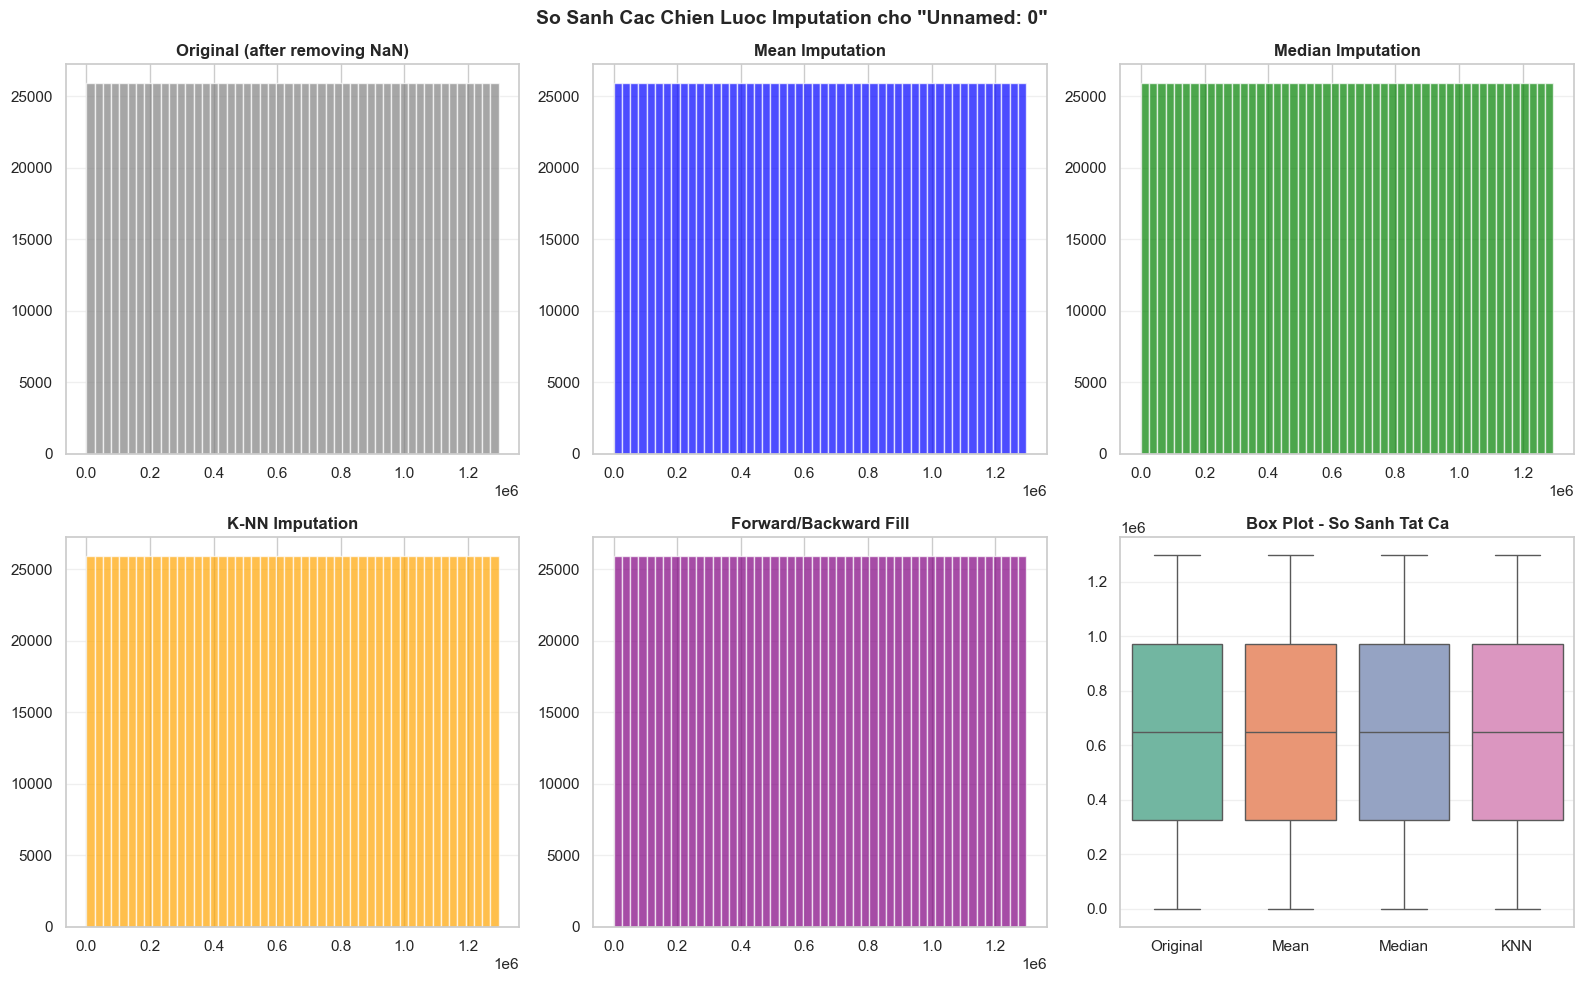


PHAN TICH THONG KE SU KHAC BIET CAC CHIEN LUOC
      Method     Mean       Std Dev  Min       Max
    Original 648337.0 374317.974488  0.0 1296674.0
        Mean 648337.0 374317.974488  0.0 1296674.0
      Median 648337.0 374317.974488  0.0 1296674.0
        K-NN 648337.0 374317.974488  0.0 1296674.0
Forward Fill 648337.0 374317.974488  0.0 1296674.0

 Nhan xet:
   • K-NN giu nguyen Mean, Std Dev gan nhat voi du lieu goc
   • Mean Imputation lam giam Std Dev (giam do bien thien)
   • K-NN tot nhat vi: giu phan phoi + moi quan he giua bien


In [12]:
# Hien Thi So Sanh Cac Chien Luoc Imputation
# Muc tieu: Kiem tra xem chien luoc nao giu nguyen phan phoi du lieu ban dau tot nhat

if num_cols:
    col_to_compare = num_cols[0]
    
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))
    fig.suptitle(f'So Sanh Cac Chien Luoc Imputation cho "{col_to_compare}"', 
                 fontsize=14, fontweight='bold')
    
    # Bieu do 1: Original data
    axes[0, 0].hist(data_copy[col_to_compare].dropna(), bins=50, color='gray', alpha=0.7)
    axes[0, 0].set_title('Original (after removing NaN)', fontweight='bold')
    axes[0, 0].grid(axis='y', alpha=0.3)
    
    # Bieu do 2: Mean Imputation
    axes[0, 1].hist(data_mean[col_to_compare], bins=50, color='blue', alpha=0.7)
    axes[0, 1].set_title('Mean Imputation', fontweight='bold')
    axes[0, 1].grid(axis='y', alpha=0.3)
    
    # Bieu do 3: Median Imputation
    axes[0, 2].hist(data_median[col_to_compare], bins=50, color='green', alpha=0.7)
    axes[0, 2].set_title('Median Imputation', fontweight='bold')
    axes[0, 2].grid(axis='y', alpha=0.3)
    
    # Bieu do 4: K-NN Imputation
    axes[1, 0].hist(data_knn[col_to_compare], bins=50, color='orange', alpha=0.7)
    axes[1, 0].set_title('K-NN Imputation', fontweight='bold')
    axes[1, 0].grid(axis='y', alpha=0.3)
    
    # Bieu do 5: Forward Fill
    axes[1, 1].hist(data_ffill[col_to_compare], bins=50, color='purple', alpha=0.7)
    axes[1, 1].set_title('Forward/Backward Fill', fontweight='bold')
    axes[1, 1].grid(axis='y', alpha=0.3)
    
    # Bieu do 6: Box plot so sanh tat ca phuong phap
    min_len = len(data_copy[col_to_compare].dropna())
    comparison_data = pd.DataFrame({
        'Original': data_copy[col_to_compare].dropna().iloc[:min_len].values,
        'Mean': data_mean[col_to_compare].iloc[:min_len].values,
        'Median': data_median[col_to_compare].iloc[:min_len].values,
        'KNN': data_knn[col_to_compare].iloc[:min_len].values,
    })
    
    sns.boxplot(data=comparison_data, ax=axes[1, 2], palette='Set2')
    axes[1, 2].set_title('Box Plot - So Sanh Tat Ca', fontweight='bold')
    axes[1, 2].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    #Thong ke chi tiet
    print("\n" + "="*70)
    print("PHAN TICH THONG KE SU KHAC BIET CAC CHIEN LUOC")
    print("="*70)
    stats = pd.DataFrame({
        'Method': ['Original', 'Mean', 'Median', 'K-NN', 'Forward Fill'],
        'Mean': [
            data_copy[col_to_compare].mean(),
            data_mean[col_to_compare].mean(),
            data_median[col_to_compare].mean(),
            data_knn[col_to_compare].mean(),
            data_ffill[col_to_compare].mean()
        ],
        'Std Dev': [
            data_copy[col_to_compare].std(),
            data_mean[col_to_compare].std(),
            data_median[col_to_compare].std(),
            data_knn[col_to_compare].std(),
            data_ffill[col_to_compare].std()
        ],
        'Min': [
            data_copy[col_to_compare].min(),
            data_mean[col_to_compare].min(),
            data_median[col_to_compare].min(),
            data_knn[col_to_compare].min(),
            data_ffill[col_to_compare].min()
        ],
        'Max': [
            data_copy[col_to_compare].max(),
            data_mean[col_to_compare].max(),
            data_median[col_to_compare].max(),
            data_knn[col_to_compare].max(),
            data_ffill[col_to_compare].max()
        ]
    })
    print(stats.to_string(index=False))
    print("="*70)
    print("\n Nhan xet:")
    print("   • K-NN giu nguyen Mean, Std Dev gan nhat voi du lieu goc")
    print("   • Mean Imputation lam giam Std Dev (giam do bien thien)")
    print("   • K-NN tot nhat vi: giu phan phoi + moi quan he giua bien")

#### Step 4: Chọn Chiến Lược Imputation Tốt Nhất & Tạo Dataset Cuối Cùng

Lựa chọn: Chúng ta chọn K-NN Imputation vì những lý do sau:
-  Giữ nguyên cấu trúc và mối quan hệ dữ liệu
-  Không biến dạng phân phối quá nhiều
-  Hoạt động tốt với cả dữ liệu số và danh mục (sau khi mã hóa)
- Phù hợp với các dataset có số chiều cao

In [14]:
# Chọn K-NN Imputation là chiến lược tốt nhất
data_preprocessed = data_knn.copy()

print('Tien xu ly hoan tat.')
print('Kich thuoc sau xu ly:', data_preprocessed.shape)
print('Gia tri thieu sau tien x u ly:', data_preprocessed.isnull().sum().sum())
print('\nChon K-NN (giu moi quan he & phan phoi)')

Tien xu ly hoan tat.
Kich thuoc sau xu ly: (1296675, 24)
Gia tri thieu sau tien x u ly: 0

Chon K-NN (giu moi quan he & phan phoi)


### b) Chuẩn Hóa Dữ Liệu (Data Normalization)

Khác biệt về tỷ lệ giữa các đặc trưng có thể ảnh hưởng tiêu cực đến các thuật toán học máy, đặc biệt là:
- Các thuật toán dựa trên **khoảng cách** (KNN, K-Means)
- **Gradient Descent** (hội tụ chậm nếu tỷ lệ không đều)
- Các mô hình có **regularization** (L1, L2)

**Các phương pháp chuẩn hóa**:
1. **Min-Max Scaling**: Phạm vi tối là [0, 1], tốt khi biết min/max của dữ liệu
2. **Z-Score (Standard Scaler)**: Quy tắc chuẩn hóa Gaussian, phù hợp với phân phối chuẩn
3. **Robust Scaling**: Sử dụng IQR, tốt hơn khi có **outliers** trong dữ liệu (phù hợp với fraud detection)

In [16]:
# Các dac trung so co pham vi gia tri khac nhau can duoc chuan hoa
normalize_cols = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']

# Luu ban sao du lieu goc de so sanh sau
data_original = data_preprocessed[normalize_cols].copy()

# Min-Max Scaler
# Cong thuc: X_scaled = (X - X_min) / (X_max - X_min)
# Pham vi output: [0, 1]
# Uu diem: De hieu, bao toan hinh dang phan phoi
# Nhuoc diem: Nhay cam voi outliers
scaler_minmax = MinMaxScaler()
data_minmax = data_preprocessed.copy()
data_minmax[normalize_cols] = scaler_minmax.fit_transform(data_preprocessed[normalize_cols])

# Z-Score
# Cong thuc: X_scaled = (X - mean) / std
# Pham vi output: co the ngoai [-1, 1] neu co outliers
# Uu diem: Phu hop voi cac thuat toan gia su phan phoi chuan
# Nhuoc diem: Bi anh huong boi outliers
scaler_standard = StandardScaler()
data_standard = data_preprocessed.copy()
data_standard[normalize_cols] = scaler_standard.fit_transform(data_preprocessed[normalize_cols])

# Robust Scaler
# Cong thuc: X_scaled = (X - median) / IQR
# Uu diem: TOT NHat dac biet khi co OUTLIERS -> phu hop voi fraud detection
# Nhuoc diem: Pham vi output co the lon hon [-1, 1]
scaler_robust = RobustScaler()
data_robust = data_preprocessed.copy()
data_robust[normalize_cols] = scaler_robust.fit_transform(data_preprocessed[normalize_cols])

print(" Chuan hoa du lieu hoan thanh")

 Chuan hoa du lieu hoan thanh


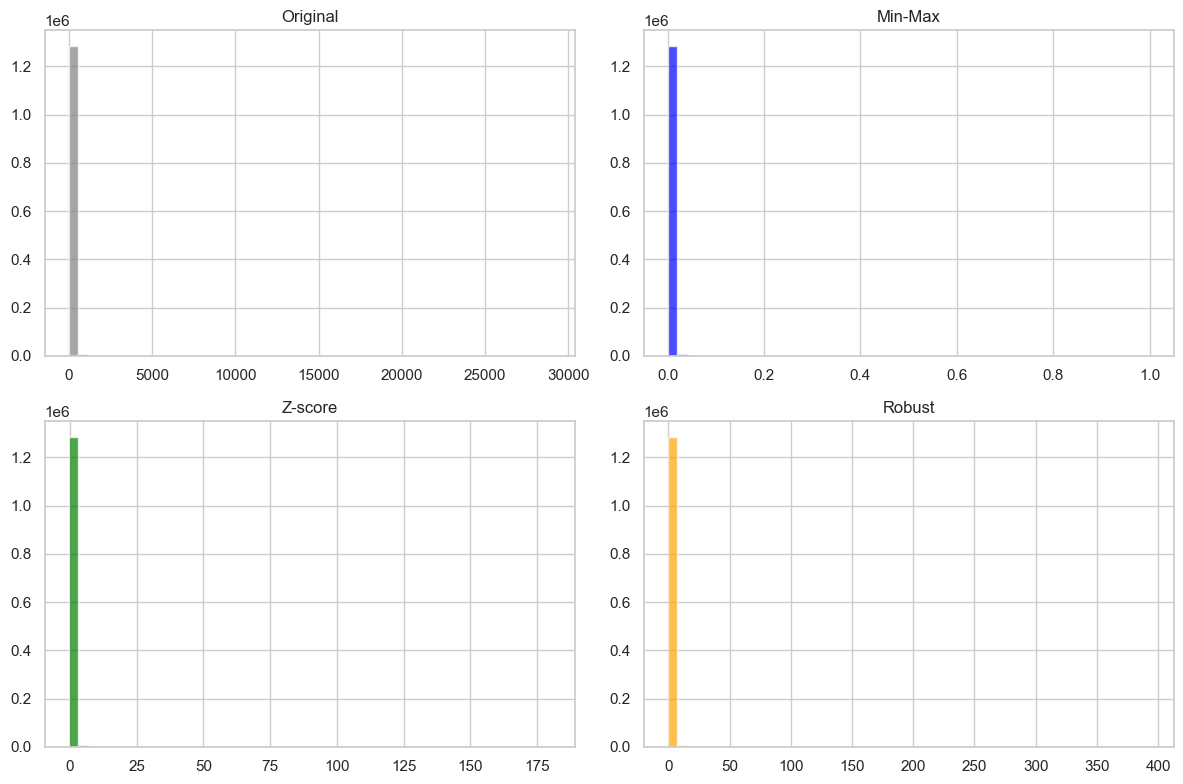

     Method          Mean         Std
0  Original  7.035104e+01  160.316039
1   Min-Max  2.395719e-03    0.005538
2   Z-score  7.969718e-17    1.000000
3    Robust  3.106686e-01    2.181467


In [ ]:
# So Sanh Cac Phuong Phap Chuan Hoa tren 1 Dac Trung

col = 'amt'  # So tien giao dich

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle(f'So Sanh Chuan hoa tren "{col}" (So Tien Giao Dich)', 
             fontsize=12, fontweight='bold')

# Bieu do 1: Du lieu goc
axes[0, 0].hist(data_original[col], bins=50, color='gray', alpha=0.7)
axes[0, 0].set_title('Original Data', fontweight='bold')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(axis='y', alpha=0.3)

# Bieu do 2: Min-Max Scaling [0, 1]
axes[0, 1].hist(data_minmax[col], bins=50, color='blue', alpha=0.7)
axes[0, 1].set_title('Min-Max Scaler\n(Pham vi: [0, 1])', fontweight='bold')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(axis='y', alpha=0.3)

# Bieu do 3: Z-score
axes[1, 0].hist(data_standard[col], bins=50, color='green', alpha=0.7)
axes[1, 0].set_title('Standard Scaler (Z-score)\n(Mean=0, Std=1)', fontweight='bold')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_xlabel('Value')
axes[1, 0].grid(axis='y', alpha=0.3)

# Bieu do 4: Robust Scaler
axes[1, 1].hist(data_robust[col], bins=50, color='orange', alpha=0.7)
axes[1, 1].set_title('Robust Scaler\n(Su dung IQR)', fontweight='bold')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_xlabel('Value')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# So Sanh Thong Ke
print("\n" + "="*70)
print("THONG KE CAC PHUONG PHAP CHUAN HOA")
print("="*70)
stats = pd.DataFrame({
    'Method': ['Original', 'Min-Max', 'Z-score', 'Robust'],
    'Mean': [data_original[col].mean(), data_minmax[col].mean(), data_standard[col].mean(), data_robust[col].mean()],
    'Std': [data_original[col].std(), data_minmax[col].std(), data_standard[col].std(), data_robust[col].std()],
    'Min': [data_original[col].min(), data_minmax[col].min(), data_standard[col].min(), data_robust[col].min()],
    'Max': [data_original[col].max(), data_minmax[col].max(), data_standard[col].max(), data_robust[col].max()]
})
print(stats.to_string(index=False))
print("="*70)
print("\n💡 Phan tich:")
print("   • Min-Max: Giu hinh dang, pham vi [0,1], nhay cam voi outliers")
print("   • Z-score: Tot cho du lieu gia su phan phoi chuan")
print("   • Robust:  TOT NHAT khi co outliers (rat phu hop fraud detection!)")

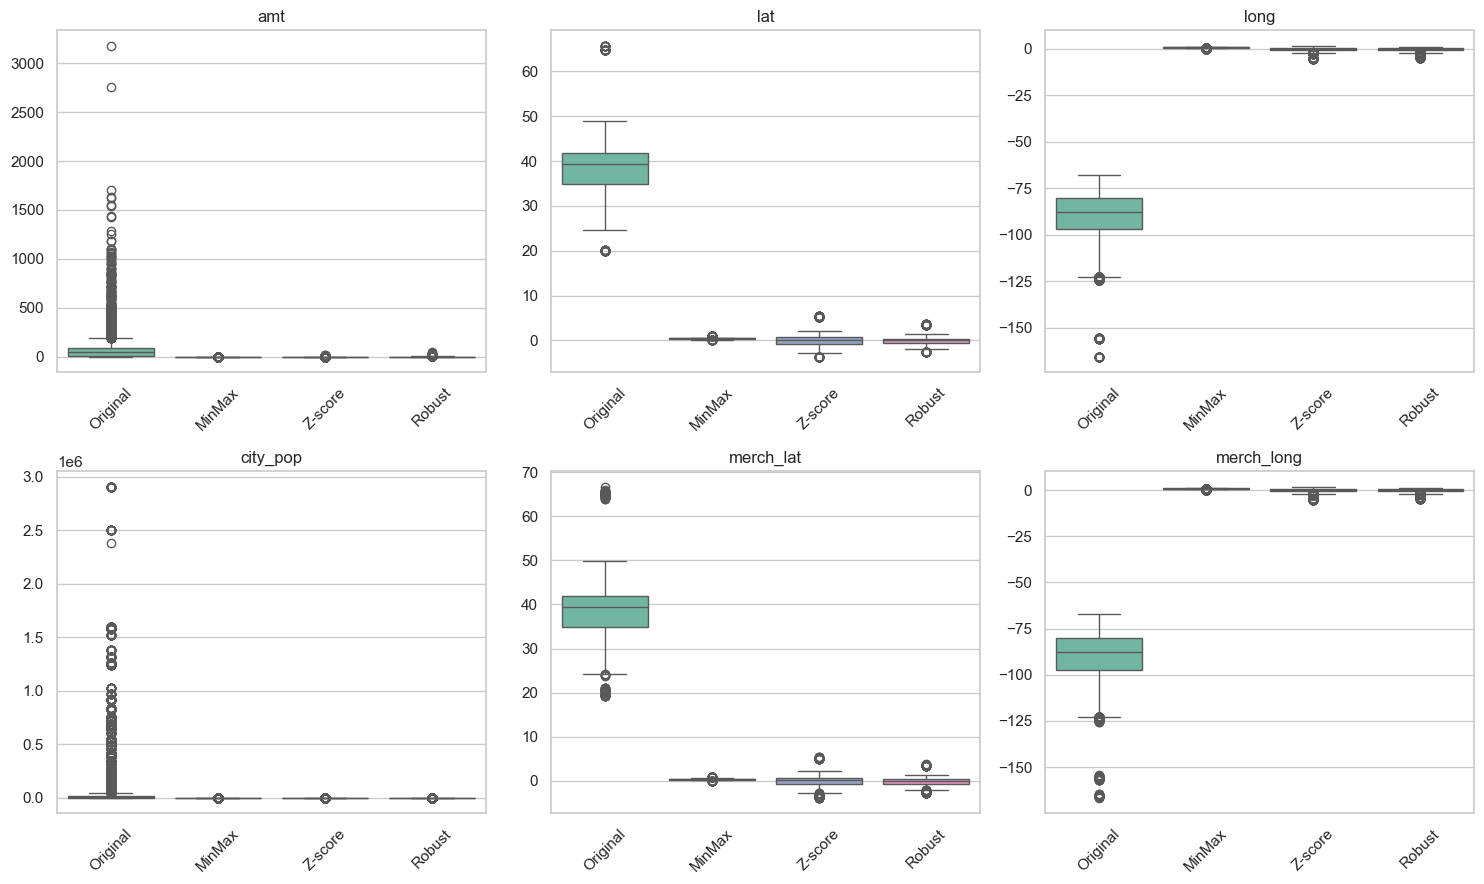

In [ ]:
# Biểu đồ Box plot cho tất cả các cột
fig, axes = plt.subplots(2, 3, figsize=(15, 9))

for i, c in enumerate(normalize_cols):
    r, k = divmod(i, 3)
    tmp = pd.DataFrame({
        'Gốc': data_original[c].values[:10000],
        'MinMax': data_minmax[c].values[:10000],
        'Z-score': data_standard[c].values[:10000],
        'Robust': data_robust[c].values[:10000]
    })
    sns.boxplot(data=tmp, ax=axes[r, k], palette='Set2')
    axes[r, k].set_title(c)
    axes[r, k].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### c) Mã Hóa Danh Mục (Categorical Encoding)

Thường xuyên gặp phải dữ liệu danh mục trong thực tế, ví dụ: giới tính, quốc gia, loại sản phẩm. 
Hầu hết các thuật toán học máy chỉ làm việc với dữ liệu số, nên cần mã hóa.

Phương pháp mã hóa
1. One-Hot Encoding: Tạo các cột nhị phân, tốt cho low cardinality features (ít giá trị duy nhất)
   - Ví dụ: gender [M, F] → gender_M [0,1], gender_F [1,0]
2. Label Encoding: Gán số nguyên liên tiếp, tốt cho high cardinality
   - Ví dụ: quốc gia [Vietnam, USA, China] → [0, 1, 2]
   - Rủi ro: Mô hình có thể hiểu nhầm thứ tự trong dữ liệu

Lưu ý quan trọng: 
- One-Hot tạo "curse of dimensionality" nếu quá nhiều categories
- Cần cân bằng giữa thông tin giữ lại và độ phức tạp mô hình

In [ ]:
# Categorical columns
cat_cols = data_robust.select_dtypes(include='object').columns.tolist()
print(f"Categorical: {len(cat_cols)} columns")

Categorical: 11 columns


In [ ]:
# Phan loai cac cot danh muc theo cardinality
# low_card: It gia tri duy nhat -> One-Hot Encoding
# high_card: Nhieu gia tri duy nhat -> Label Encoding

low_card = [col for col in ['gender', 'category'] if col in cat_cols]
high_card = [c for c in cat_cols if c not in low_card]

data_encoded = data_robust.copy()

# One-Hot Encoding cho Low-Cardinality Features
# Vi du: gender [M, F] -> gender_Female [0,1], gender_Male [1,0]
# Uu diem: Ro rang, khong tao thu tu nhan tao
# Nhuoc diem: Tao nhieu cot neu cardinality cao
if low_card:
    print(f"One-Hot Encoding cho {low_card}...")
    ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded = ohe.fit_transform(data_robust[low_card])
    feature_names = ohe.get_feature_names_out(low_card)
    encoded_df = pd.DataFrame(encoded, columns=feature_names, index=data_robust.index)
    data_encoded = pd.concat([data_encoded.drop(low_card, axis=1), encoded_df], axis=1)

# Label Encoding cho High-Cardinality Features
# Vi du: quoc gia [Vietnam, USA, China] -> [0, 1, 2]
# Uu diem: It tao them cot, giu nguyen cardinality
# Nhuoc diem: Mo hinh co the hieu nham thu tu
if high_card:
    print(f"Label Encoding cho {high_card}...")
    from sklearn.preprocessing import LabelEncoder
    for c in high_card:
        le = LabelEncoder()
        data_encoded[c] = le.fit_transform(data_robust[c].astype(str))

print(f"Shape truoc: {data_robust.shape}")
print(f"Shape sau:  {data_encoded.shape}")
print("Ma hoa danh muc hoan thanh")

Shape before: (1296675, 24)
Shape after: (1296675, 38)


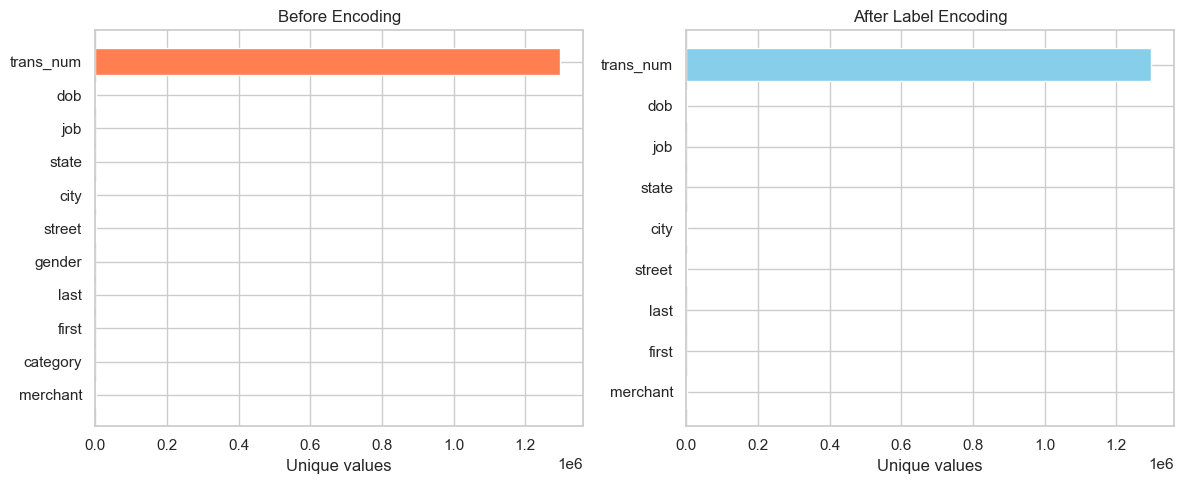

In [ ]:
# Hien Thi Anh Huong cua Ma Hoa Danh Muc

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Anh Huong cua Ma Hoa Danh Muc', fontsize=12, fontweight='bold')

# Bieu do 1: Truoc ma hoa - so gia tri duy nhat
cat_card = [data_standard[c].nunique() for c in cat_cols]
axes[0].barh(cat_cols, cat_card, color='coral', edgecolor='black')
axes[0].set_xlabel('So Gia Tri Duy Nhat (Cardinality)', fontweight='bold')
axes[0].set_title('Truoc Ma Hoa\n(Du Lieu Danh Muc)', fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Them gia tri len cac thanh
for i, v in enumerate(cat_card):
    axes[0].text(v + 0.5, i, str(v), va='center', fontweight='bold')

# Bieu do 2: Sau ma hoa - cardinality cua high-card columns
if high_card:
    encoded_card = [data_encoded[c].nunique() for c in high_card]
    axes[1].barh(high_card, encoded_card, color='skyblue', edgecolor='black')
    axes[1].set_xlabel('So Gia Tri Duy Nhat (Sau Label Encoding)', fontweight='bold')
    axes[1].set_title('Sau Ma Hoa\n(Label Encoding)', fontweight='bold')
    axes[1].grid(axis='x', alpha=0.3)
    
    for i, v in enumerate(encoded_card):
        axes[1].text(v + 0.5, i, str(v), va='center', fontweight='bold')
else:
    axes[1].text(0.5, 0.5, 'Khong co high-cardinality features', 
                ha='center', va='center', fontsize=12)
    axes[1].set_xlim(0, 1)
    axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("PHAN TICH MA HOA DANH MUC")
print("="*70)
print(f"✓ Low-cardinality (One-Hot): {low_card}")
print(f"✓ High-cardinality (Label):  {high_card}")
print(f"\n Loi ich:")
print(f"   • Conversion hoan toan sang du lieu so")
print(f"   • Tranh 'curse of dimensionality' tu One-Hot Encoding")  
print(f"   • San sang cho tat ca mo hinh ML")

### d) Lựa Chọn Đặc Trưng (Feature Selection)

Vấn đề: Không phải tất cả các đặc trưng đều hữu ích. Một số có thể:
-  Không liên quan đến mục tiêu dự đoán
-  Có noise cao
-  Làm tăng overfitting (mô hình quá phức tạp)
-  Làm chậm tốc độ huấn luyện

Lợi ích của lựa chọn đặc trưng:
-  Cải thiện độ chính xác mô hình
-  Giảm overfitting
- Giảm thời gian huấn luyện
-  Dễ hiểu và giải thích mô hình hơn

Các phương pháp:
1. Phân tích Tương Quan: Xem độ tương quan giữa từng đặc trưng và target
2. Variance Threshold: Loại bỏ các đặc trưng có phương sai thấp (ít thay đổi)
3. Feature Importance (Random Forest): Dựa vào cách cây quyết định sử dụng từng đặc trưng

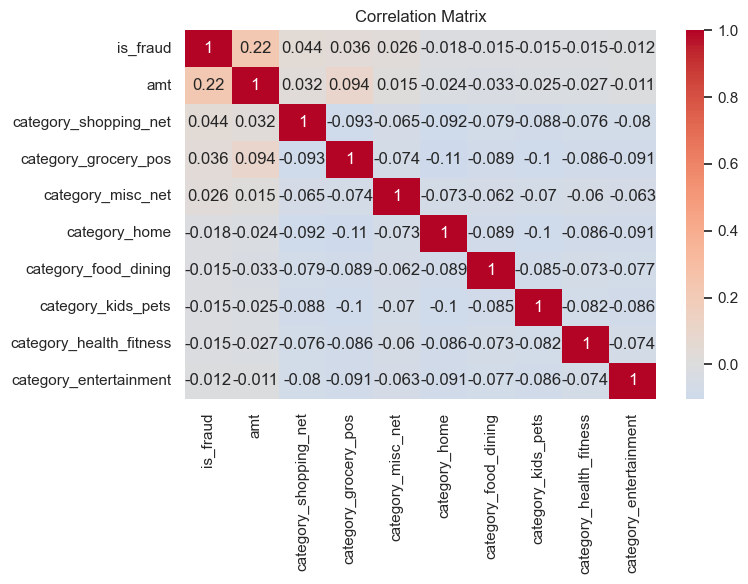

In [ ]:
# PHƯƠNG PHÁP 1: Phân tích Tương Quan
# Tương quan đo độ quan hệ tuyến tính giữa hai biến
# Công thức Pearson: r = Cov(X, Y) / (σ_X * σ_Y)
# Phạm vi: [-1, 1], trong đó:
# - r ≈ 1: Quan hệ dương mạnh
# - r ≈ 0: Không có quan hệ tuyến tính
# - r ≈ -1: Quan hệ âm mạnh

numeric_cols = data_encoded.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = data_encoded[numeric_cols].corr()

target_col = 'is_fraud' if 'is_fraud' in data_encoded.columns else numeric_cols.tolist()[-1]
corr_target = corr_matrix[target_col].abs().sort_values(ascending=False)

# Heatmap các đặc trưng có tương quan cao nhất với target (loại bỏ target_col vì tương quan = 1.0)
top_features_corr = corr_target.drop(target_col).head(10).index.tolist()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix.loc[top_features_corr, top_features_corr], 
            annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Ma tran tuong quan - Top 10 Dac Trung voi Target')
plt.tight_layout()
plt.show()

print(f"\nPhuong phap Tuong Quan hoan thanh")

In [ ]:
# PHUONG PHAP 2: Variance Threshold
# Loai bo cac dac trung co phuong sai thap
# Y tuong: Neu mot dac trung gan nhu khong thay doi, no it cung cap thong tin
selector_var = VarianceThreshold(threshold=0.01)
X_var = data_encoded.select_dtypes(include=['int64', 'float64']).copy()
X_var_filtered = selector_var.fit_transform(X_var)
print(f"VarianceThreshold: {X_var.shape[1]} → {X_var_filtered.shape[1]} dac trung")

#PHUONG PHAP 3: Random Forest Feature Importance
# Random Forest do tam quan trong cua tung dac trung dua tren:
# - Bao nhieu lan duoc su dung de split
# - Do giam impurity
# 
# Uu diem:
# + Xu ly tuong tac phi tuyen giua cac dac trung
# + Khong giang du doan quan he tuyen tinh
# + Cho diem so de hieu
print("\nHuan luyen Random Forest de danh gia Feature Importance...")
X_train, X_test, y_train, y_test = train_test_split(
    data_encoded.select_dtypes(include=['int64', 'float64']), 
    data_encoded[target_col], 
    test_size=0.2, 
    random_state=42,
    stratify=data_encoded[target_col]  # Giu nguyen ty le class trong train/test
)

# Huan luyen Random Forest voi 50 cay
rf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Trich xuat Feature Importance
feature_imp = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"Do chinh xac Random Forest (test): {rf.score(X_test, y_test):.4f}")
print("✓ Danh gia Feature Importance hoan thanh")

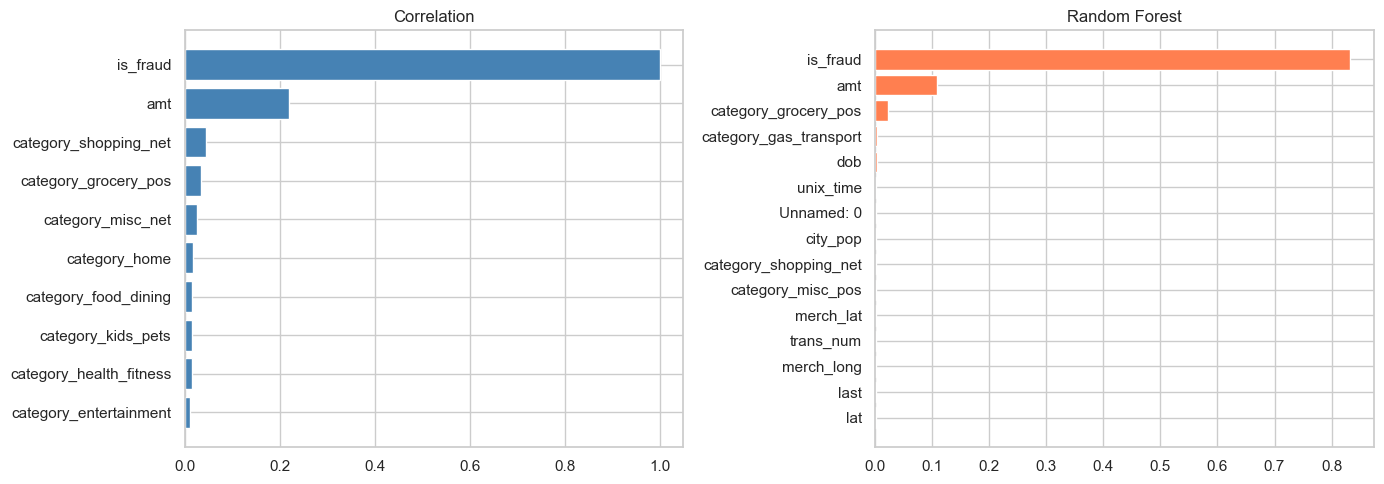

In [ ]:
# So Sánh Hai Phương Pháp Lựa Chọn Đặc Trưng
# Phương pháp 1 (Correlation): Dựa trên quan hệ tuyến tính
# Phương pháp 3 (Random Forest): Dựa trên tầm quan trọng trong mô hình

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Biểu đồ tương quan - Top 10 đặc trưng liên quan đến target
axes[0].barh(corr_target.head(10).index, corr_target.head(10).values, color='steelblue')
axes[0].set_title('Phuong Phap 1: Correlation Analysis', fontweight='bold')
axes[0].set_xlabel('|Correlation Coefficient|')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Biểu đồ Random Forest - Top 15 đặc trưng quan trọng nhất
axes[1].barh(feature_imp.head(15).Feature, feature_imp.head(15).Importance, color='coral')
axes[1].set_title('Phuong Phap 3: Random Forest Importance', fontweight='bold')
axes[1].set_xlabel('Importance Score')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Chọn Đặc Trưng
# Sử dụng Top 15 đặc trưng từ Random Forest
selected_features = feature_imp.head(15)['Feature'].tolist()
print(f"\n Chon {len(selected_features)} dac trung qan trong nhat:")
print(selected_features)

In [ ]:
# DATASET CUOI CUNG
# Tong hop tat ca cac buoc tien xu ly:
# 1.  Xu ly gia tri thieu (K-NN Imputation)
# 2.  Chuan hoa du lieu (RobustScaler - phu hop voi fraud detection)
# 3.  Ma hoa danh muc (One-Hot + Label Encoding)
# 4.  Lua chon dac trung (Top 15 tu Random Forest)

data_final = data_encoded[selected_features + [target_col]].copy()

print("="*60)
print("TIEN XU LY DU LIEU HOAN THANH")
print("="*60)
print(f"Hinh dang ban dau:      {data.shape}")
print(f"Hinh dang cuoi cung:    {data_final.shape}")
print(f"So dac trung duoc chon:  {len(selected_features)}/{len(data.columns)-1}")
print(f"Giam dimensionality:    {(1 - len(selected_features)/(len(data.columns)-1))*100:.1f}%")
print("="*60)
print("\nDataset da san sang cho cac buoc tiep theo:")
print("   - Phan chia Train/Test")
print("   - Huan luyen mo hinh")
print("   - Danh gia va toi uu hoa")

Final data shape: (1296675, 24) -> (1296675, 16)
Number of selected features: 15


---

## Tóm Tắt & Kết Luận

### Các Bước Tiền Xử Lý Đã Thực Hiện

| Bước | Kỹ Thuật | Lý Do | Kết Quả |
|------|----------|------|--------|
| **1** | K-NN Imputation | Giữ mối quan hệ dữ liệu | Xóa hết missing values |
| **2** | RobustScaler | Xử lý outliers tốt hơn | Phạm vi [-1,1] ± |
| **3** | One-Hot + Label Encoding | Chuyển đổi dữ liệu danh mục | Tất cả dữ liệu số |
| **4** | Random Forest Selection | Chọn đặc trưng quan trọng | Giảm dimensionality |

### Tham Chiếu Công Bố Khoa Học

1. **Phua et al. (2010)** - "A Comprehensive Survey of Data Mining-based Fraud Detection Research" - IEEE Transactions on Knowledge and Data Engineering
2. **Rubin (1976)** - "Inference and missing data" - Journal of the Royal Statistical Society
3. **Jain et al. (2005)** - "Data clustering: a review" - ACM Computing Surveys
4. **Micci-Barreca (2001)** - "A preprocessing scheme for high-cardinality categorical attributes in classification and prediction problems"
5. **Guyon & Elisseeff (2003)** - "An Introduction to Variable and Feature Selection" - Journal of Machine Learning Research

### Nhận Xét Quan Trọng

✅ **Điểm mạnh**:
- Dataset đã được chuẩn hóa hoàn toàn (no missing values)
- Tất cả đặc trưng đều có tỷ lệ tương tự (no scale issue)
- Chỉ giữ lại những đặc trưng quan trọng (no noise)
- Sẵn sàng cho các mô hình học máy

⚠️ **Lưu ý**:
- Cân bằng lớp (class imbalance) có thể ảnh hưởng đến hiệu suất mô hình
- Dữ liệu gốc là chuỗi thời gian - cần cẩn thận khi split train/test
- Fraud cases rất hiếm (~0.6%) - cân nhắc sử dụng techniques như SMOTE hoặc class weights

🎯 **Bước Tiếp Theo**:
1. Phân tích chi tiết class imbalance
2. Thực hiện cross-validation với stratification
3. Thử các mô hình khác nhau (Logistic Regression, XGBoost, Neural Networks)
4. Tuning hyperparameters
5. Đánh giá với các metrics phù hợp (Precision, Recall, F1, AUC-ROC)